# Workshop Nº1
## Mineria de Datos 2021-1 (TEL-354)

### Nombre: Yeriel Paz Ureta
### Rol: 201630042-2

## 1 - Carga y Descripción de Datos

La actual pandemia ha relevado la importancia de los datos, su análisis y confiabilidad de las conclusiones, ya que las políticas públicas se adoptan con esta información impactan fuertemente nuestras vidas e incluso su continuidad. Una luz de esperanza en este momento es el proceso de vacunación, el cual independiente de nuestras opiniones, es un proceso cuantificable, y por lo tanto las aseveraciones esgrimidas por la autoridad pueden ser verificadas desde los datos.

## 1.1 - Carga de Datos

En el aula encontrará el archivo ``ws1.csv``, que contiene el progreso de la vacunación en todo el mundo (datos obtenidos de https://ourworldindata.org/). La descripción de cada columna (en inglés) es:

```
Country- this is the country for which the vaccination information is provided;
Country ISO Code - ISO code for the country;
Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
Total number of vaccinations - this is the absolute number of total immunizations in the country;
Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
Number of vaccinations per day - number of daily vaccination for that day and country;
Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
Vaccines used in the country - total number of vaccines used in the country (up to date);
Source name - source of the information (national authority, international organization, local organization etc.);
Source website - website of the source of information;
```

Si nos fijamos en la descripción de la fecha (Date), se indica que hay datos faltantes en este dataset.

Usted debe **cargar los datos** usando ``pandas``, **hacer una tabla en Markdown** indicando el tipo de variable de cada característica, y **cuantificar** la cantidad de columnas y filas con valores faltantes, además de entregar **estadísticas generales** de estas columnas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
data = pd.read_csv('ws1.csv')
df = pd.DataFrame(data)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


|               Columna                   | Tipo de dato     |
|:-----------------------------------:    |:------------:    |
|               country                   |    string        |
|               iso_code                  |    string        |
|                 date                    |   datetime       |
|          total_vaccinations             |     float        |
|          people_vaccinated              |     float        |
|       people_fully_vaccinated           |     float        |
|        daily_vaccinations_raw           |     float        |
|          daily_vaccinations             |     float        |
|    total_vaccinations_per_hundred       |     float        |
|    people_vaccinated_per_hundred        |     float        |
| people_fully_vaccinated_per_hundred     |     float        |
|    daily_vaccinations_per_million       |     float        |
|               vaccines                  |    string        |
|             source_name                 |    string        |
|            source_website               |    string        |

In [57]:
col = df.isnull().sum()        # Resultado por columnas
col 

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5285
people_vaccinated                      5951
people_fully_vaccinated                7895
daily_vaccinations_raw                 6539
daily_vaccinations                      224
total_vaccinations_per_hundred         5285
people_vaccinated_per_hundred          5951
people_fully_vaccinated_per_hundred    7895
daily_vaccinations_per_million          224
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [66]:
row = df.isnull().sum(axis=1)  # Resultado por filas
row = row[row>0]
print('Cantidad de filas con Nan ',row.count())
print(row)

Cantidad de filas con Nan  8461
0        5
1        7
2        7
3        7
4        7
        ..
12936    2
12937    2
12938    2
12939    2
12940    2
Length: 8461, dtype: int64


In [3]:
df.describe() # Estadistica descriptiva sobre el dataset

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.685000e+03,7.019000e+03,5.075000e+03,6.431000e+03,1.274600e+04,7685.000000,7019.000000,5075.000000,12746.000000
mean,4.171433e+06,2.837641e+06,1.342669e+06,1.243998e+05,7.262680e+04,13.647413,10.098639,4.975304,2892.638632
std,1.662850e+07,1.035773e+07,5.731043e+06,4.604124e+05,3.193707e+05,21.644899,14.409839,9.476525,4844.139815
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.276800e+04,4.633050e+04,2.132500e+04,2.851500e+03,8.950000e+02,1.110000,1.010000,0.540000,335.000000
50%,3.615110e+05,2.933600e+05,1.522170e+05,1.511600e+04,5.770000e+03,5.310000,4.170000,1.980000,1415.000000
75%,1.691159e+06,1.242364e+06,6.162790e+05,5.950100e+04,2.731550e+04,16.910000,12.520000,5.245000,3671.000000
max,2.133882e+08,1.332670e+08,8.622351e+07,7.185000e+06,5.190143e+06,198.010000,106.560000,91.450000,118759.000000


### Pregunta
¿Qué tan incompleto es el dataset? ¿Tiene sentido que falten tantos datos en la cantidad de personas completamente vacunadas por ejemplo? ¿Tiene sentido eliminar columnas o filas porque tienen datos faltantes?

### Respuesta
- Comparando el total de filas del dataset con la cantidad de filas sin datos por columna se puede ver que este se encuentra parcialmente completo

- Sí tiene sentido que falten datos dado a que estos depende del ritmo de vacunación de cada país del dataset y la condición de cada país para vacunar a su población.

- Solo hace sentido eliminar filas y solo aquellas a las que le falta todos las columnas que tengan relación con la vacunación es decir aquellas filas que tengan más de 7 Nan


## 1.2 Formato y Realidad Chilena
La columna date corresponde a un string, el cual puede ser interpretado como tiempo (numérico). ``pandas``y Python soportan tipos de datos ``datetime``, por lo que busque la forma de tener una columna en este formato para su DataFrame. Luego seleccione solo los datos referente a Chile y haga **un solo plot** con la cantidad de vacunas, personas vacunadas y personas vacunadas con segunda dosis en el tiempo.

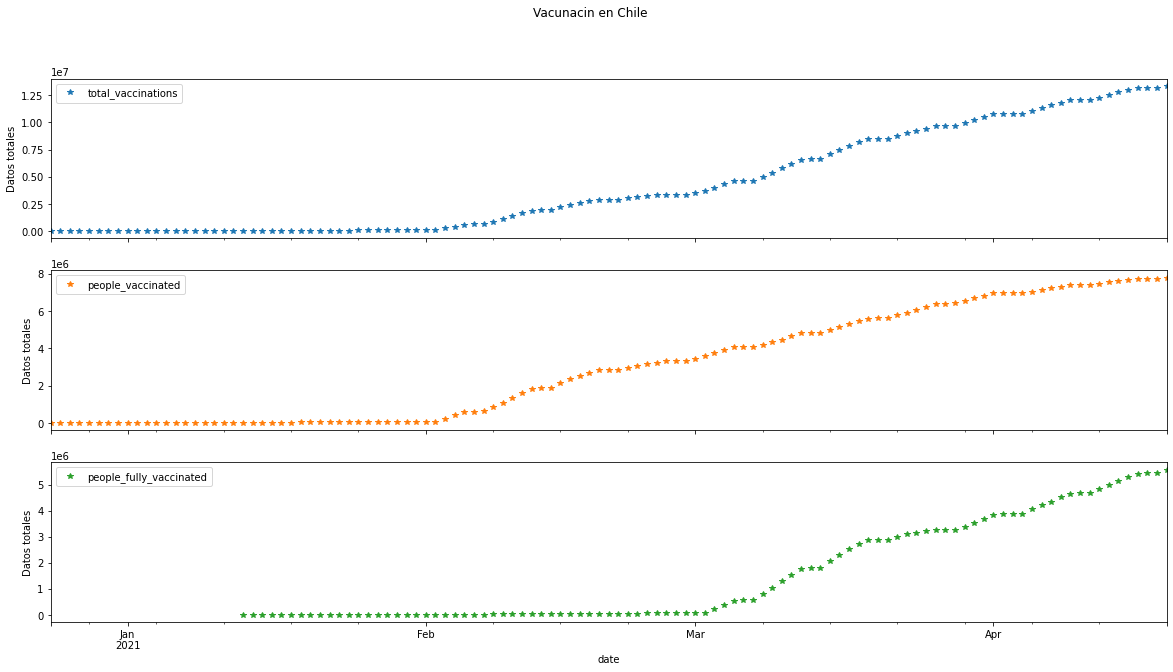

In [89]:
df['date'] = pd.to_datetime(df.date)
dfChile = df[df['country'] == 'Chile']
dfChile.set_index('date',inplace=True)

cols_plot = ['total_vaccinations','people_vaccinated','people_fully_vaccinated']
axes = dfChile[cols_plot].plot(marker='*',linestyle='None',figsize=(20,10),subplots=True,title='Vacunacin en Chile')
for ax in axes:
    ax.set_ylabel('Datos totales')

### Pregunta:
¿Cuando comenzaron las segundas dosis? ¿Puede usted graficar las evolución de la vacunación de primera dosis? ¿Qué puede inferir de la velocidad de vacunación de primeras dosis en el tiempo?

### Respuesta

- Del gráfico de people_fully_vaccinated se puede apreciar que el proceso de vacunación de la segunda dosis comenzó a inicios del mes de marzo

- La evolución de la primera dosis si se puede graficar para ello se debe sacar la diferencia entre las columnas people_vaccinated y people_fully_vaccinated y graficar

- Con respecto a la velocidad de vacunación de la primera dosis se puede apreciar que al inicio este fue creciente hasta inicios de marzo logrando tener a 35.000.000 personas vacunas luego se estancó el ritmo de vacunación dado a la implementación de la vacunación de la segunda dosis

<AxesSubplot:title={'center':'Primera dosis en Chile'}, xlabel='date', ylabel='people_single_vaccinated'>

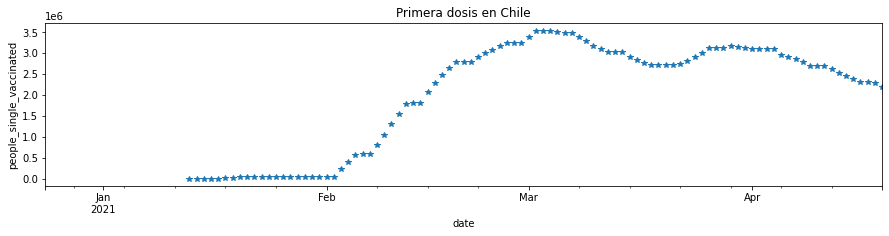

In [86]:
dfChile = dfChile.assign(people_single_vaccinated = dfChile['people_vaccinated']-dfChile['people_fully_vaccinated'])
dfChile['people_single_vaccinated'].plot(marker='*',linestyle='None',figsize=(15,3),ylabel='people_single_vaccinated',title='Primera dosis en Chile')

## 2 - Comparación con otros paises

## 2.1 - Israel vs Chile
Es conocido el caso de Israel, el cual ha tenido una vacunación muy acelerada. Diseñe un grafico que compare nuestro país con Chile de forma normalizada (cada 100 habitantes). Aproveche de realizar el mismo gráfico de las primeras vacunas de la sección anterior (normalizadas ahora) para Chile e Israel

<AxesSubplot:title={'center':'Comparacion Chile y Israel en vacunacion'}, xlabel='date', ylabel='people_vaccinated_per_hundred'>

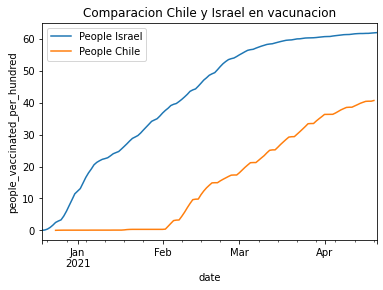

In [98]:
dfIsrael = df[df['country'] == 'Israel']
dfChile = df[df['country'] == 'Chile']

axi = plt.gca()

dfIsrael.plot(x='date',y='people_vaccinated_per_hundred',ax=axi,label='People Israel')
dfChile.plot(x='date',y='people_vaccinated_per_hundred',ax=axi,label='People Chile',ylabel='people_vaccinated_per_hundred',title='Comparacion Chile y Israel en vacunacion')

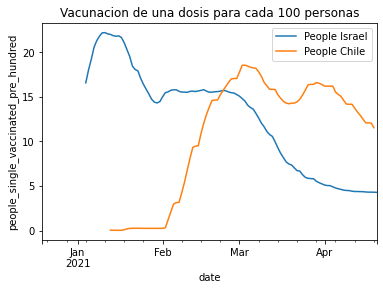

In [107]:
dfChile = dfChile.assign(people_single_vaccinated = dfChile['people_vaccinated_per_hundred']-dfChile['people_fully_vaccinated_per_hundred'])
dfIsrael = dfIsrael.assign(people_single_vaccinated = dfIsrael['people_vaccinated_per_hundred']-dfIsrael['people_fully_vaccinated_per_hundred'])

axi = plt.gca()
dfIsrael.plot(x='date',y='people_single_vaccinated',ax=axi,label='People Israel')
dfChile.plot(x='date',y='people_single_vaccinated',ax=axi,label='People Chile',ylabel='people_single_vaccinated_pre_hundred',title='Vacunacion de una dosis para cada 100 personas')
plt.show()

### Pregunta:
¿Qué conclusiones puede usted sacar de esta comparación? ¿Son similares las curvas? ¿Consideró en su análisis cuando comenzó el proceso en cada país? ¿Qué podríamos esperar a futuro considerando la vacunación en israel como modelo?

### Respuesta:

- La vacunación de Israel es mucho más acelerada que la de chile y esta comenzó un mes antes por lo cual cuando chile tenía sus primero vacunados Israel ya tenia 40% de la población vacunada aproximadamente.

- Ambas curvas son similares dado que son creciente pero las pendientes de esta no. Israel tiene una pendiente mucho mayor lo que implica un ritmo más acelerado de vacunación que el de chile.

- Si se toma la curva de crecimiento de Israel como modelo se espera que la vacunación siga en aumento hasta que gran parte de la poblacion está vacunada que sería el punto en el que la curva empieza hacer asintótica


## 2.2 - Comportamiento segundas dosis en el mundo
Considere ahora solo **la última medición por país**, y considere que nos interesa saber la cantidad de personas vacunadas versus las vacunas inoculadas, lo que debiese entregar información indirectamente sobre que tan avanzado se está con las segundas dosis. Para esto, puede ocupar agrupamiento de datos (i.e. groupby) u otra técnica. Seleccione los 15 paises con mayor cantidad de vacunaciones (normalizadas), y muestre estas tablas con estas dos características.

- total_vaccinations: Total de gente inoculada
- people_vaccinated: Gente vacunada
- delta: Diferencia de la gente inoculada vs vacunada

In [159]:
df = pd.DataFrame(data)
df = df[df.groupby('country')['date'].transform('max')==df['date']]
df = df.sort_values('total_vaccinations_per_hundred',ascending=False)
df = df.assign(delta = df['total_vaccinations']-df['people_vaccinated'])
dfTop = df.head(15)
dfTop[['country','total_vaccinations','people_vaccinated','delta','people_fully_vaccinated']]

,country,total_vaccinations,people_vaccinated,delta,people_fully_vaccinated
4483,Gibraltar,66712.0,35901.0,30811.0,30811.0
3865,Falkland Islands,4407.0,2632.0,1775.0,1775.0
5910,Israel,10354300.0,5362917.0,4991383.0,4991383.0
10798,Seychelles,116957.0,66433.0,50524.0,50524.0
2169,Cayman Islands,63350.0,34614.0,28736.0,28736.0
1450,Bermuda,52337.0,30094.0,22243.0,22243.0
5787,Isle of Man,66414.0,50923.0,15491.0,15491.0
12902,Wales,2309974.0,1699092.0,610882.0,610882.0
6205,Jersey,73426.0,47673.0,25753.0,25753.0
2286,Chile,13352602.0,7777919.0,5574683.0,5574683.0


In [160]:
dfIsland = dfTop.drop(df.index[[0,2,7,9]]) #NO son islas
dfIsland[['country','total_vaccinations','people_vaccinated','delta','people_fully_vaccinated']]

,country,total_vaccinations,people_vaccinated,delta,people_fully_vaccinated
3865,Falkland Islands,4407.0,2632.0,1775.0,1775.0
10798,Seychelles,116957.0,66433.0,50524.0,50524.0
2169,Cayman Islands,63350.0,34614.0,28736.0,28736.0
1450,Bermuda,52337.0,30094.0,22243.0,22243.0
5787,Isle of Man,66414.0,50923.0,15491.0,15491.0
6205,Jersey,73426.0,47673.0,25753.0,25753.0
4864,Guernsey,46587.0,32969.0,13618.0,13618.0
951,Bahrain,1118519.0,627047.0,491472.0,491472.0
10541,Scotland,3547319.0,2750052.0,797267.0,797267.0
3545,England,36447797.0,27713634.0,8734163.0,8734163.0


### Pregunta:
¿Cree usted que es justo comparar Estados Unidos con Gibraltar? ¿Qué tienen en común los paises que son islas en este ranking? ¿Como usted filtraria para tener una comparación más justa?

### Respuesta
- No creo que sea justo comparar Estados unidos con Gibraltar dado que el nivel poblacional no es comparable
- Se puede concluir que los países que son islas presentan aproximadamente la mitad de la población vacunas con las dos dosis, es decir, totalmente vacunados esto puede ser posible dado la demografía de estos lugares
- Para hacerlo lo más justo posible hay que comparar el  total de vacunados cada cien entre los países con mayor densidad poblacional a la última medición por país

## 2.3 Gráfico de Dispersión de Paises Top en Vacunación

Aplique su filtro y haga un gráfico de dispersión con estas dos variable sobre el top 15 del nuevo ranking, incluyendo los nombres del país sobre el gráfico. Dibuje una linea diagonal en el diagrama para tener como referencia.

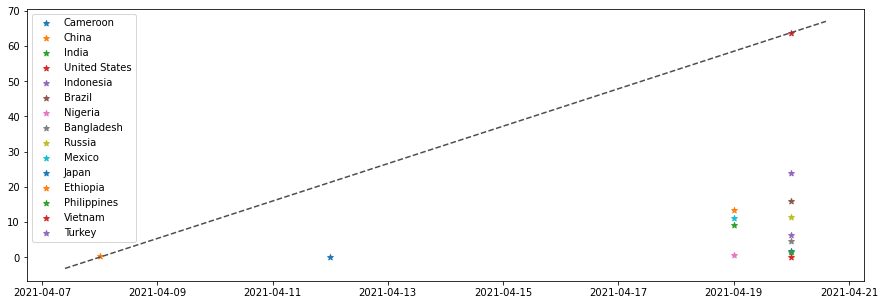

In [42]:
df = pd.DataFrame(data)
#df['date'] = pd.to_datetime(df.date)
df = df[df.groupby('country')['date'].transform('max')==df['date']]
df = df.assign(population  = (df['total_vaccinations_per_hundred']/(100*df['total_vaccinations']))**(-1))
df = df.sort_values('population',ascending=False)
dfTop = df.head(15)

f, ax = plt.subplots(figsize=(15, 5))
for x, y, label in zip(dfTop['date'], dfTop['total_vaccinations_per_hundred'], dfTop['country']):
    plt.scatter(x, y, label=label,marker='*')

ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.legend()
plt.show()


## Pregunta: 
¿Qué significa que los paises se alejen de la diagonal? ¿Es Israel un buen modelo para proyectarse, o existen otros paises que pudieran darnos mejores predicciones? ¿Considera que este taller es una tarea de minería de datos?

### Respuesta
- Si se toma la recta como el modelo a seguir para el plan de vacunación que un punto se aleje de la recta significa que dicho país no es capaz de llevar el ritmo de vacunación de su población

- Según la gráfica obtenida no es posible concluir si israel es un buen modelo de proyección un buen país como modelo a partir de la gráfica sería Cameroon

- El taller es solo una parte del proceso de minería de datos ya que se utilizan las herramientas tecnológicas para transformar datos en información 

  
